In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [7]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [8]:
import random
import torch

In [9]:
# Ex.2: split data randomly into train, dev, test sets: 80%/10%/10%

In [10]:
# lets check if we have same shuffle in both notebooks using our own local random object,
# with the same seed
r = random.Random(2147483647)
r.shuffle(words)
words[:5]

['khole', 'harbour', 'devon', 'baine', 'erisha']

In [11]:
p80 = int(len(words) * 0.8)
p90 = int(len(words) * 0.9)
print(f'{p80=}, {p90=}')
train = words[:p80]
dev = words[p80:p90]
test = words[p90:]
print(f'train %: {len(train)/len(words)*100}, dev %: {len(dev)/len(words)*100}, test %: {len(test)/len(words)*100}')

p80=25626, p90=28829
train %: 79.99875128773452, dev %: 9.999063465800893, test %: 10.002185246464583


In [12]:
print(train[:5])
print(dev[:5])
print(test[:5])

['khole', 'harbour', 'devon', 'baine', 'erisha']
['shterna', 'tyanna', 'sarra', 'malachy', 'zenaya']
['phoenyx', 'christionna', 'bastien', 'niloufar', 'masa']


In [13]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [14]:
# we create dicts from full data but populate counts (train) only from train set
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [15]:
# train
for w in train:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

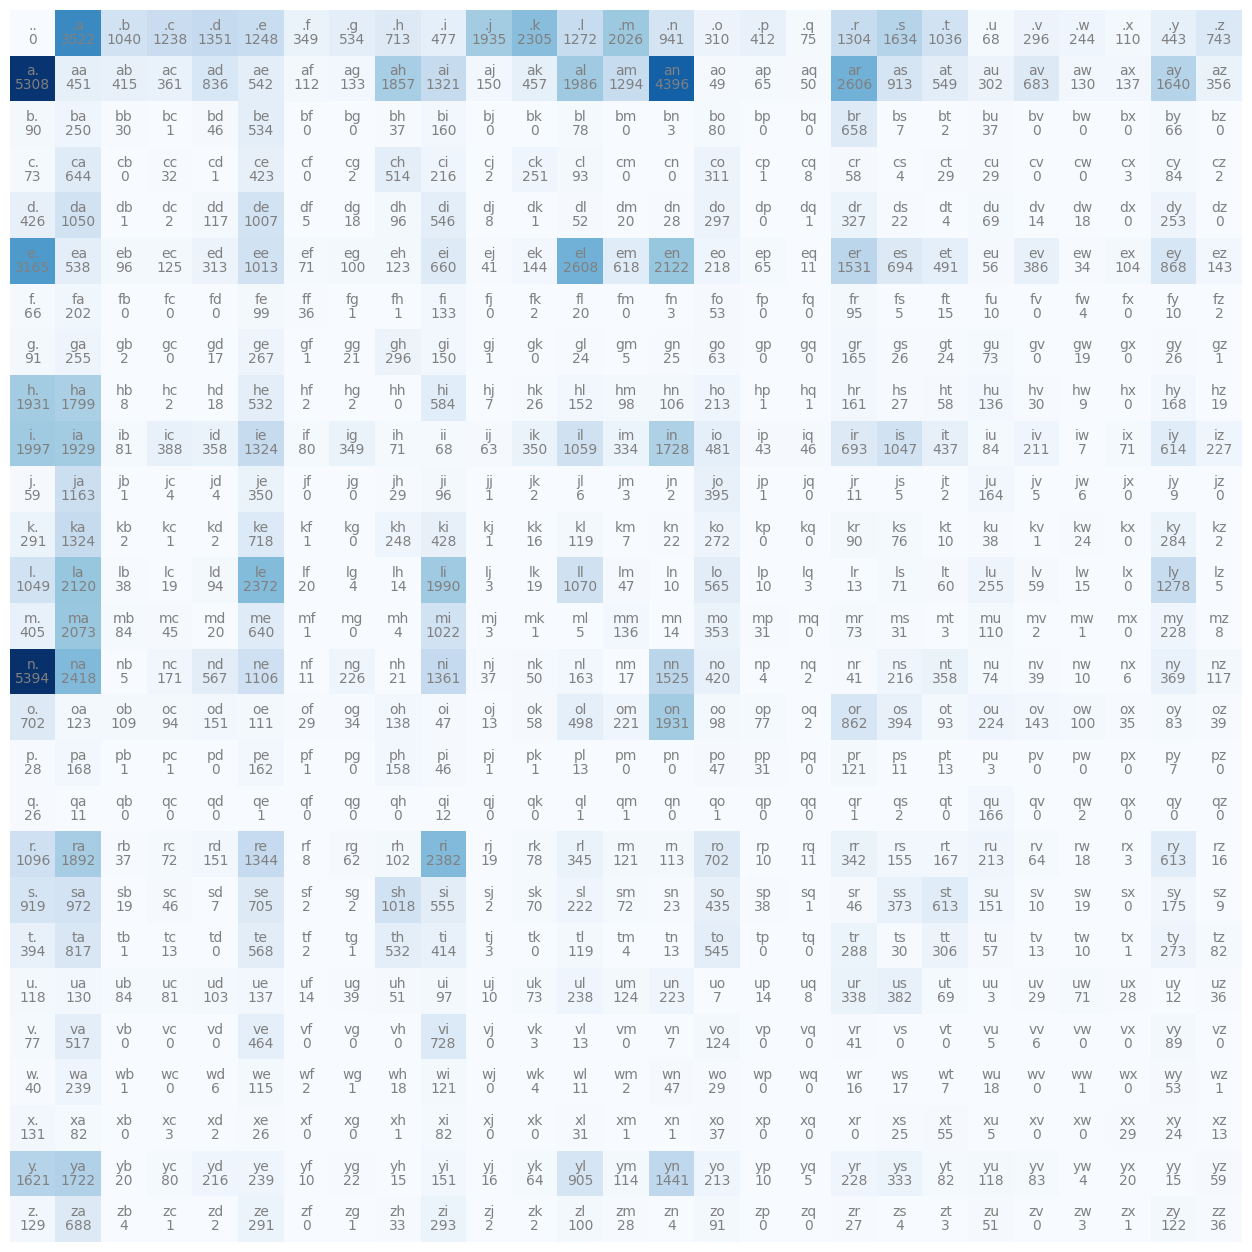

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [17]:
N[0]

tensor([   0, 3522, 1040, 1238, 1351, 1248,  349,  534,  713,  477, 1935, 2305,
        1272, 2026,  941,  310,  412,   75, 1304, 1634, 1036,   68,  296,  244,
         110,  443,  743], dtype=torch.int32)

In [18]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1374, 0.0406, 0.0483, 0.0527, 0.0487, 0.0136, 0.0208, 0.0278,
        0.0186, 0.0755, 0.0899, 0.0496, 0.0791, 0.0367, 0.0121, 0.0161, 0.0029,
        0.0509, 0.0638, 0.0404, 0.0027, 0.0116, 0.0095, 0.0043, 0.0173, 0.0290])

In [19]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [20]:
P = (N+1).float() # smooth
P /= P.sum(1, keepdims=True)

In [21]:
# sample
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [22]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [23]:
# evaluate on train set
log_likelihood = 0.0
n = 0

for w in train:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print('evaluate on train set')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

evaluate on train set
log_likelihood=tensor(-448232.8750)
nll=tensor(448232.8750)
2.455451726913452


In [24]:
# evaluate on dev set
log_likelihood = 0.0
n = 0

for w in dev:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print('evaluate dev set')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

evaluate dev set
log_likelihood=tensor(-56076.6719)
nll=tensor(56076.6719)
2.455195903778076


In [25]:
# evaluate on test set
log_likelihood = 0.0
n = 0

for w in test:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print('evaluate test set')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

evaluate test set
log_likelihood=tensor(-55794.8945)
nll=tensor(55794.8945)
2.4514453411102295


In [26]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. k
k h
h o
o l
l e
e .


In [27]:
xs

tensor([ 0, 11,  8, 15, 12,  5])

In [28]:
ys

tensor([11,  8, 15, 12,  5,  0])

In [29]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
xenc.shape

torch.Size([6, 27])

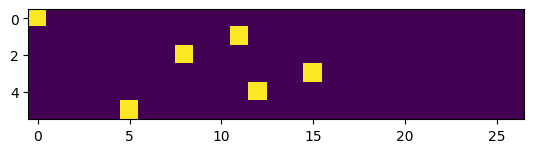

In [31]:
plt.imshow(xenc)

In [32]:
xenc.dtype

torch.float32

In [48]:
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [47]:
W = torch.randn((27, 3))
print(W)
xenc @ W

tensor([[ 0.1422,  0.9828, -1.0205],
        [-0.8715,  0.1981, -0.3597],
        [ 1.0131,  0.3393,  0.4202],
        [-0.0542,  0.8955, -0.9289],
        [ 1.1021, -1.5368, -0.9229],
        [-1.8558, -0.5134, -2.9627],
        [ 0.2888,  0.2487,  0.2831],
        [-0.2154,  0.0202,  0.6217],
        [ 0.1997, -1.2537, -0.1078],
        [ 0.0154,  1.9255, -0.0874],
        [-0.2288, -0.8602,  1.4232],
        [-1.1879,  1.7452, -0.5727],
        [ 1.6245, -0.3806, -0.5559],
        [-1.4485,  0.5627, -0.6764],
        [-1.2102,  1.8498,  0.8150],
        [-1.8514, -1.6182, -0.0510],
        [-0.4259,  0.0384,  0.9825],
        [ 0.0342, -0.2054, -1.2507],
        [ 0.9245,  0.1202, -0.8784],
        [ 0.3485, -0.5892, -1.0997],
        [ 0.6119,  0.2556,  0.2646],
        [ 1.1243,  1.3182,  0.8795],
        [ 1.5256, -0.6789, -0.0800],
        [-1.0176,  0.8985,  1.3814],
        [-0.1489, -0.2014, -0.4033],
        [ 2.1146,  0.4084, -0.0705],
        [-1.1379,  0.5341,  1.0177]])


tensor([[ 0.1422,  0.9828, -1.0205],
        [-1.1879,  1.7452, -0.5727],
        [ 0.1997, -1.2537, -0.1078],
        [-1.8514, -1.6182, -0.0510],
        [ 1.6245, -0.3806, -0.5559],
        [-1.8558, -0.5134, -2.9627]])

In [52]:
(W[xs] == xenc @ W).all()

tensor(True)

In [65]:
logits = torch.zeros(12,3)
logits[torch.arange(len(xs))] = W[xs]

In [72]:
W[torch.cat([xs, xs])]

tensor([[ 0.1422,  0.9828, -1.0205],
        [-1.1879,  1.7452, -0.5727],
        [ 0.1997, -1.2537, -0.1078],
        [-1.8514, -1.6182, -0.0510],
        [ 1.6245, -0.3806, -0.5559],
        [-1.8558, -0.5134, -2.9627],
        [ 0.1422,  0.9828, -1.0205],
        [-1.1879,  1.7452, -0.5727],
        [ 0.1997, -1.2537, -0.1078],
        [-1.8514, -1.6182, -0.0510],
        [ 1.6245, -0.3806, -0.5559],
        [-1.8558, -0.5134, -2.9627]])

In [43]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.9323, 0.0182, 0.0495],
        [0.0591, 0.5088, 0.4321],
        [0.1086, 0.6623, 0.2291],
        [0.6887, 0.0216, 0.2897],
        [0.7019, 0.2728, 0.0254],
        [0.1280, 0.4442, 0.4278]])

In [45]:
probs[0].shape

torch.Size([3])

In [46]:
probs[0].sum()

tensor(1.)

In [38]:
# (5, 27) @ (27, 27) -> (5, 27)

In [39]:
# SUMMARY ------------------------------>>>>

In [40]:
xs

tensor([ 0, 11,  8, 15, 12,  5])

In [41]:
ys

tensor([11,  8, 15, 12,  5,  0])

In [58]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [59]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [60]:
probs.shape

torch.Size([6, 27])

In [61]:

nlls = torch.zeros(6)
for i in range(6):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .k (indexes 0,11)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 11
probability assigned by the net to the the correct character: 0.027797512710094452
log likelihood: -3.58280873298645
negative log likelihood: 3.58280873298645
--------
bigram example 2: kh (indexes 11,8)
input to the neural net: 11
output probabilities from the neural net: tensor([0.0065, 0.0446, 0.0052, 0.0091, 0.0787, 0.0122, 0.0621, 0.0676, 0.0543,
        0.0146, 0.0066, 0.0622, 0.1245, 0.0203, 0.0145, 0.0502, 0.0342, 0.0201,
        0.0365, 0.0386, 0.0637, 0.0165, 0.0617, 0.0343, 0.0405, 0.0025, 0.0182])
label (actual next character): 8
probability assigned by the net to the the correct character: 0

In [62]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [63]:
xs

tensor([ 0, 11,  8, 15, 12,  5])

In [64]:
ys

tensor([11,  8, 15, 12,  5,  0])

In [65]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [78]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(6), ys].log().mean()

In [79]:
print(loss.item())

3.3832826614379883


In [80]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [81]:
W.data += -0.1 * W.grad

In [65]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [82]:
# create the dataset from training data
xs, ys = [], []
for w in train:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  182546


In [83]:
# gradient descent
for k in range(120):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.7704033851623535
3.380580186843872
3.1626663208007812
3.028700113296509
2.9360382556915283
2.8688299655914307
2.8182520866394043
2.778707504272461
2.74676251411438
2.7202839851379395
2.697909116744995
2.6787352561950684
2.6621346473693848
2.6476519107818604
2.634939432144165
2.6237215995788574
2.613773822784424
2.604910373687744
2.5969769954681396
2.589843511581421
2.5834014415740967
2.577559232711792
2.572240114212036
2.567378282546997
2.5629193782806396
2.5588159561157227
2.555028200149536
2.551522731781006
2.5482699871063232
2.5452449321746826
2.542426586151123
2.539795398712158
2.537335157394409
2.5350310802459717
2.5328705310821533
2.53084135055542
2.528932571411133
2.5271358489990234
2.525442123413086
2.523843288421631
2.5223331451416016
2.520904302597046
2.5195517539978027
2.5182693004608154
2.517052412033081
2.5158965587615967
2.5147976875305176
2.5137522220611572
2.5127556324005127
2.511805772781372
2.510899305343628
2.5100340843200684
2.509207010269165
2.5084152221679688
2.

In [84]:
# create the dataset from dev data
xs, ys = [], []
for w in dev:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# forward pass to compute dev set loss
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

number of examples:  22840
2.4854736328125


In [85]:
# create the dataset from test data
xs, ys = [], []
for w in test:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# forward pass to compute dev set loss
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

number of examples:  22760
2.483207941055298


In [86]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


In [87]:
W[0]

tensor([-2.5727,  2.0463,  0.8257,  0.9999,  1.0872,  1.0079, -0.2579,  0.1620,
         0.4492,  0.0501,  1.4467,  1.6218,  1.0270,  1.4927,  0.7259, -0.3740,
        -0.0946, -1.6929,  1.0518,  1.2775,  0.8219, -1.7247, -0.4193, -0.6070,
        -1.3462, -0.0230,  0.4903], grad_fn=<SelectBackward0>)

In [ ]:
# Training on train part of the data and evaluating on dev and test sets
# gives about the same loss on all mentioned sets.